In [1]:
import pandas as pd
import numpy as np

In [6]:
df = pd.DataFrame({'sex' : ['M','F',np.nan,'M','F'],
                   'score' : [5,4,3,4,np.nan]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [3]:
df['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

In [4]:
pd.isna(df)

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [7]:
pd.isna(df).sum()

sex      1
score    1
dtype: int64

In [8]:
df.dropna(subset = ['score'])

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [10]:
df_nomiss = df.dropna(subset = ['score'])
df_nomiss['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
Name: score, dtype: float64

In [11]:
df_nomiss = df.dropna(subset = ['score', 'sex'])
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [12]:
df_nomiss2 = df.dropna()
df_nomiss2

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [13]:
df['score'].mean()

4.0

In [14]:
df['score'].sum()

16.0

In [15]:
df.groupby('sex').agg(mean_score = ('score', 'mean'),
                      sum_score = ('score', 'sum'))

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


In [17]:
exam = pd.read_csv('exam.csv')
exam.loc[[2,7,14],['math']] = np.nan
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [18]:
exam['math'].mean()

55.23529411764706

In [19]:
exam['math'] = exam['math'].fillna(55)
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,55.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [20]:
exam['math'].isna().sum()

0

In [21]:
df = pd.DataFrame({'sex' : [1,2,1,3,2,1],
                   'score' : [5,4,3,4,2,6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [28]:
df['sex'].value_counts().sort_index()

sex
1.0    3
2.0    2
Name: count, dtype: int64

In [29]:
df['score'].value_counts().sort_index()

score
2    1
3    1
4    2
5    1
6    1
Name: count, dtype: int64

In [31]:
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [32]:
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [34]:
df.dropna(subset = ['sex', 'score']) \
    .groupby('sex') \
    .agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [35]:
df = pd.DataFrame({'x1' : [1,1,2,2]})
df['x2'] = np.where(df['x1'] == 1, 'a', np.nan)
df

,x1,x2
0,1,a
1,1,a
2,2,nan
3,2,nan


In [36]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,False
3,False,False


결측치가 아니라 문자 nan으로 변환하는 거라 결측치로 추출이 안됨 주의

In [38]:
df['x2'] = np.where(df['x1'] == 1, 'a', 'etc')

In [39]:
df['x2'] = df['x2'].replace('etc',np.nan)
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,2,NaN


In [40]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


이런식으로 변환해여 결측값으로 추출 됨

In [51]:
mpg = pd.read_csv('mpg.csv')

<Axes: ylabel='hwy'>

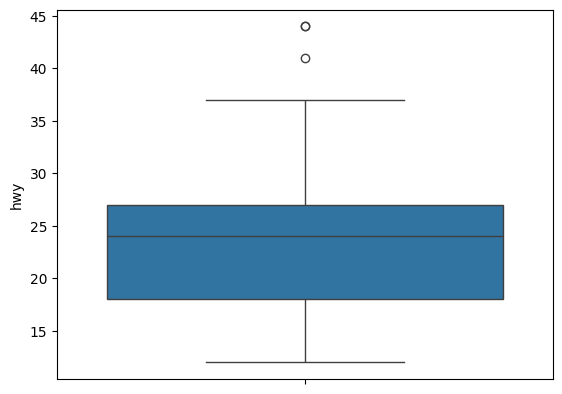

In [50]:
import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy')

In [52]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [54]:
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [56]:
iqr = pct75- pct25

In [57]:
pct25 - 1.5 * iqr

4.5

In [58]:
pct75 + 1.5 * iqr 

40.5

In [62]:
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5),
                       np.nan, mpg['hwy'])

In [63]:
mpg['hwy'].isna().sum()

3

In [64]:
mpg.dropna(subset = ['hwy'])\
    .groupby('drv')\
    .agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000
